In [1]:
#We import the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import string
import sys  
from datetime import datetime

In [2]:
#Next we import the relevant csv file for analysis and display it
news = pd.read_csv('news_v2.csv')
news.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [3]:
#We remove the column 'Unnamed: 0' and then display the updated news dataframe
news.drop('Unnamed: 0', axis=1, inplace=True)
news.head(10)

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [4]:
#We rename the column 'label' to 'True/False'
news.rename({'label':'True/False'}, axis=1, inplace=True)

In [5]:
news.head(10)

,title,text,True/False
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [6]:
#Cleaning the text fields

#Removing all singular letters except 'a'
alphabet = list(string.ascii_lowercase)
alphabet = alphabet[1:]

for letter in alphabet:
    news['text'] = news['text'].replace(' '+letter+' ', ' ', regex=True)

#Removing all words with contractions
news['text'] = news['text'].replace(' re ', ' are ', regex=True)
news['text'] = news['text'].replace(' ve ', ' have ', regex=True)
news['text'] = news['text'].replace(' ll ', ' will ', regex=True)
news['text'] = news['text'].replace('[^\w\s]+', '', regex=True)

#Removing all numbers
news['text'] = news['text'].str.replace(r'\d+', '',regex=True)

#Removing all extra spaces
news['text'] = news['text'].str.replace('\s+', ' ', regex=True)

#Converting all text and titles to lowercase
news['text']=news['text'].str.lower() 
news['title'] = news['title'].str.lower()
news

,title,text,True/False
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
1,NaN,did they post their votes for hillary already,1
2,unbelievable! obama’s attorney general says mo...,now most of the demonstrators gathered last n...,1
3,"bobby jindal, raised hindu, uses story of chri...",a dozen politically active pastors came here f...,0
4,satan 2: russia unvelis an image of its terrif...,the rs sarmat missile dubbed satan will replac...,1
...,...,...,...
72129,russians steal research on trump in hack of u....,washington reuters hackers believed to be work...,0
72130,watch: giuliani demands that democrats apolog...,you know because in fantasyland republicans ne...,1
72131,migrants refuse to leave train at refugee camp...,migrants refuse to leave train at refugee camp...,0
72132,trump tussle gives unpopular mexican leader mu...,mexico city reuters donald trumps combative st...,0


In [7]:
#Performing the same tasks for titles

#Removing all singular letters except 'a'
alphabet = list(string.ascii_lowercase)
alphabet = alphabet[1:]

for letter in alphabet:
    news['title'] = news['title'].replace(' '+letter+' ', ' ', regex=True)

#Removing all words with contractions
news['title'] = news['title'].replace(' re ', ' are ', regex=True)
news['title'] = news['title'].replace(' ve ', ' have ', regex=True)
news['title'] = news['title'].replace(' ll ', ' will ', regex=True)
news['title'] = news['title'].replace('[^\w\s]+', '', regex=True)

#Removing all numbers
news['title'] = news['title'].str.replace(r'\d+', '',regex=True)

#Removing all extra spaces
news['title'] = news['title'].str.replace('\s+',' ', regex=True)

news

,title,text,True/False
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
1,NaN,did they post their votes for hillary already,1
2,unbelievable obamas attorney general says most...,now most of the demonstrators gathered last n...,1
3,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,0
4,satan russia unvelis an image of its terrifyin...,the rs sarmat missile dubbed satan will replac...,1
...,...,...,...
72129,russians steal research on trump in hack of us...,washington reuters hackers believed to be work...,0
72130,watch giuliani demands that democrats apologi...,you know because in fantasyland republicans ne...,1
72131,migrants refuse to leave train at refugee camp...,migrants refuse to leave train at refugee camp...,0
72132,trump tussle gives unpopular mexican leader mu...,mexico city reuters donald trumps combative st...,0


In [8]:
#We observe that there are 8508 news that are duplicated, hence we will be dropping them.
news.duplicated().sum()

8508

In [9]:
print("Before removing:")
news.describe()

Before removing:


,True/False
count,72134.000000
mean,0.514404
std,0.499796
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
#We drop the duplicate rows from the dataframe and return the new updated dataframe
news.drop_duplicates(inplace=True)
print("After removing:")
news.describe()

After removing:


,True/False
count,63626.000000
mean,0.453557
std,0.497842
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [11]:
#We observe that there are 518 titles.
news['title'].isnull().sum()

518

In [12]:
#We observe that there are 39 text.
news['text'].isnull().sum()

39

In [13]:
print("Before removing:")
news.describe()

Before removing:


,True/False
count,63626.000000
mean,0.453557
std,0.497842
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [14]:
#We create an updated news dataframe by only selecting the rows where the title column is not null or NaN
news = news[news['title'].notna()]

In [15]:
#We create an updated news dataframe by only selecting the rows where the text column is not null or NaN
news = news[news['text'].notna()]

In [16]:
print("After removing:")
news.describe()

After removing:


,True/False
count,63069.000000
mean,0.448731
std,0.497368
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [17]:
news.head(10)

,title,text,True/False
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
2,unbelievable obamas attorney general says most...,now most of the demonstrators gathered last n...,1
3,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,0
4,satan russia unvelis an image of its terrifyin...,the rs sarmat missile dubbed satan will replac...,1
5,about time christian group sues amazon and spl...,all we can say on this one is it about time so...,1
6,dr ben carson targeted by the irs i never had ...,dr ben carson tells the story of what happened...,1
7,house intel chair on trumprussia fake story no...,,1
8,sports bar owner bans nfl gameswill show only ...,the owner of the ringling bar located south of...,1
9,latest pipeline leak underscores dangers of da...,file in this sept file photo the marker that w...,1
10,gop senator just smacked down the most puncha...,the most punchable altright nazi on the intern...,1


In [18]:
#This code writes the current state of the "news" DataFrame
#to a CSV file named "news_updated_v2.csv" in the current working directory.
news.to_csv('news_updated_v2.csv', index=False)

In [19]:
# Load the data
news_data = pd.read_csv('news_updated_v2.csv')
new_news_data = news_data.loc[:, ['text', 'True/False']]
new_news_data_2 = news_data.loc[:, ['title', 'True/False']]

In [20]:
#updates the dataframe 'new_news_data_2' by selecting only the rows where the "title" column is not null.
new_news_data_2 = new_news_data_2[new_news_data_2['title'].notna()]

In [21]:
#imports necessary libraries and modules to build a machine learning model.
import xgboost as xgb
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
#we open the file 'news_classifier_text' with the pickle model
with open('news_classifier_text.pkl', 'rb') as f:
    model = pickle.load(f)

In [23]:
# Separate the text (X) and labels (y)
X = new_news_data['text']
y = new_news_data['True/False']

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=50)
X_test_tfidf = tfidf.fit_transform(X)

In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(y, y_pred)
confusion = confusion_matrix(y, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.22424646022610156


The accuracy is incredibly low since the model only predicts around 1 in 4 samples correctly.
<br>
<br>
One possible reason for this is an imbalance in the classifications for the training data set. If there is an unconscious bias in the data that is fed to the model then it is possible that the model also incorporates this bias when running on the test dataset. Another reason could be the number of max_features used. If we increase this we may increase the accuracy but there is a risk of overfitting the data which means we would get an inflated accuracy value.

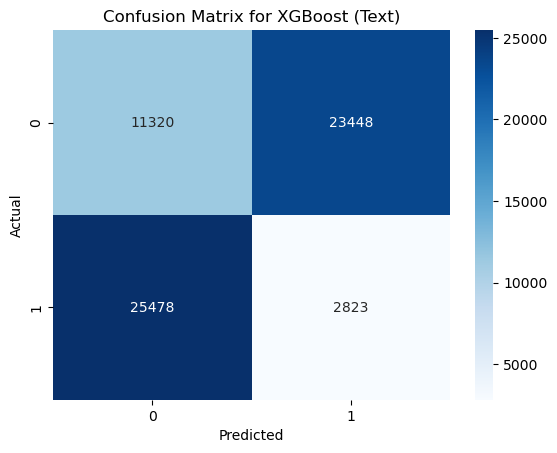

In [25]:
#generate a heatmap based off the confusion matrix 
sb.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for XGBoost (Text)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
#load the file 'news_classifier_title' with the pickle model
with open('news_classifier_title.pkl', 'rb') as f:
    model = pickle.load(f)

In [27]:
# Separate the title (X) and labels (y)
X = new_news_data_2['title']
y = new_news_data_2['True/False']
# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=50)
X_test_tfidf = tfidf.fit_transform(X)

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(y, y_pred)
confusion = confusion_matrix(y, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4626752077123105


This accuracy is higher than the previous pickled model. There are many possible reasons for this. Some include:
<br>
1) The title of an article may contain more informative words that can help to identify the sentiment of the article as compared to the text
<br>
2) The title is more concise and has less filler words or 'noise' that may confuse the model as compared to the text
<br>
3) Text is more complex and has many moods and nuances as compared to the title which makes it more difficult to capture the sentiment.

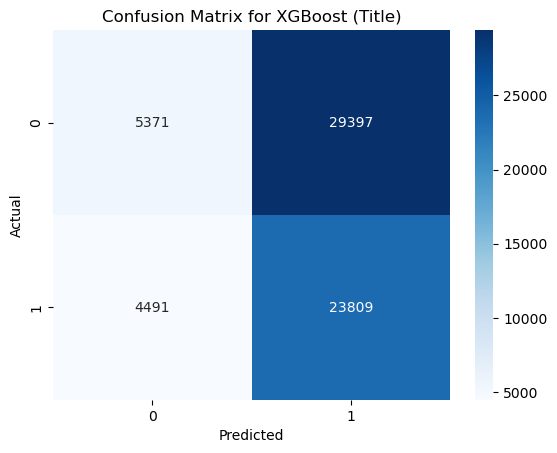

In [29]:
#generate a heatmap from the confusion matrix 
sb.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for XGBoost (Title)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
#mports necessary libraries and modules for building a neural network using Keras with TensorFlow backend
import tensorflow as tf
tf.keras.backend.set_image_data_format("channels_last")
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
# Tokenize text
tokenizer = Tokenizer(num_words=50)
tokenizer.fit_on_texts(new_news_data)
X_test = tokenizer.texts_to_sequences(new_news_data['text'])
y_test = new_news_data['True/False']

# Pad sequences
X_test = pad_sequences(X_test, maxlen=1000)

# Define model
model = Sequential()
model.add(Embedding(input_dim=50, output_dim=64, input_length=1000))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
#loads a saved Keras model from a file named "news_classifier_text.h5" using the load_model function from Keras
model = load_model('news_classifier_text.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1000, 64)          3200      
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 36,289
Trainable params: 36,289
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Test model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)
print('Accuracy:', accuracy_score(y_test, y_pred_binary))

1971/1971 [==============================] - 570s 287ms/step
Accuracy: 0.5514436569471531


Again, this is quite a low accuracy but it is a step up from before. 
<br>
<br>
There are several possible reasons for the inaccuracy. Some include:
<br>
1) Insufficient and/or biased training data: The model might be overfitting to the training data and not capturing the underlying patterns of the problem.
<br>
2) Hyperparameter tuning: The model hyperparameters (e.g., learning rate, batch size, number of epochs) might not be properly tuned.
<br> 
3) Inappropriate model architecture: Overly simple models, for example, may not capture complexity whereas complex models may overfit

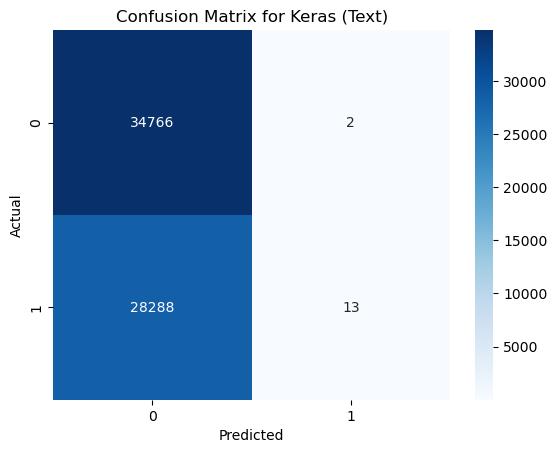

In [34]:
#generate a heatmap based off the confusion matrix
confusion = confusion_matrix(y_test,y_pred_binary)
sb.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Keras (Text)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# Tokenize text
tokenizer = Tokenizer(num_words=50)
tokenizer.fit_on_texts(new_news_data_2)
X_test = tokenizer.texts_to_sequences(new_news_data_2['title'])
y_test = new_news_data_2['True/False']

# Pad sequences
X_test = pad_sequences(X_test, maxlen=100)

# Define model
model = Sequential()
model.add(Embedding(input_dim=50, output_dim=64, input_length=100))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
##loads a saved Keras model from a file named "news_classifier_title.h5" using the load_model function from Keras
model = load_model('news_classifier_title.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           3200      
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 36,289
Trainable params: 36,289
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Test model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)
print('Accuracy:', accuracy_score(y_test, y_pred_binary))

1971/1971 [==============================] - 45s 22ms/step
Accuracy: 0.44872201433373504


There is a negligible decrease in accuracy from the previous 'title' model when compared to this. This means 'title' is a bit less accurate as a predictor variable in this model. The speculated issues are still mostly the same. Due to the complexity of the models used it is a bit difficult to pinpoint the exact reasons why the accuracy may be so low but there are a host of reasons one can try to work with in order to improve the model.

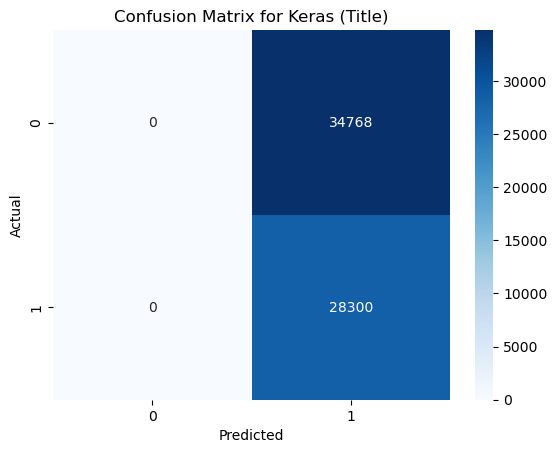

In [38]:
#create heatmap from confusion matrix
confusion = confusion_matrix(y_test,y_pred_binary)
sb.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Keras (Title)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()